In [7]:
!pip install gensim nltk

In [8]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

sentences = [
    "I love playing football",
    "She loves watching movies",
    "He enjoys playing cricket",
    "They love going to the park",
    "We enjoy reading books"
]

# Tokenize each sentence into words
tokenized_sentences = [word_tokenize(sent.lower()) for sent in sentences]
print(tokenized_sentences)


[['i', 'love', 'playing', 'football'], ['she', 'loves', 'watching', 'movies'], ['he', 'enjoys', 'playing', 'cricket'], ['they', 'love', 'going', 'to', 'the', 'park'], ['we', 'enjoy', 'reading', 'books']]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\narsi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
from gensim.models import Word2Vec

# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_sentences, vector_size=50, window=2, min_count=1, workers=2)

# Save the model (optional)
model.save("tiny_word2vec.model")


In [10]:
# Load model (if you saved it)
model = Word2Vec.load("tiny_word2vec.model")

# Get vector for a word
vector = model.wv['love']
print(vector)

# Find similar words
similar_words = model.wv.most_similar('love')
print(similar_words)


[-1.07401039e-03  4.73518390e-04  1.02109024e-02  1.80207398e-02
 -1.86063629e-02 -1.42321195e-02  1.29196234e-02  1.79454163e-02
 -1.00328000e-02 -7.52702029e-03  1.47625497e-02 -3.06899915e-03
 -9.07036848e-03  1.31084174e-02 -9.71937366e-03 -3.63061973e-03
  5.75113855e-03  1.98541628e-03 -1.65746175e-02 -1.89011134e-02
  1.46236336e-02  1.01439692e-02  1.35190664e-02  1.52316561e-03
  1.26998080e-02 -6.80943858e-03 -1.89345016e-03  1.15353270e-02
 -1.50452675e-02 -7.87375867e-03 -1.50247375e-02 -1.86136470e-03
  1.90768987e-02 -1.46375699e-02 -4.66752890e-03 -3.87515151e-03
  1.61546562e-02 -1.18601713e-02  9.06346904e-05 -9.50881746e-03
 -1.92064773e-02  1.00145973e-02 -1.75207350e-02 -8.78260750e-03
 -6.80233061e-05 -5.93174133e-04 -1.53241409e-02  1.92302000e-02
  9.96651221e-03  1.84649695e-02]
[('enjoy', 0.2705352306365967), ('to', 0.21067924797534943), ('cricket', 0.1671048253774643), ('going', 0.15018129348754883), ('watching', 0.13202737271785736), ('books', 0.1267131716012

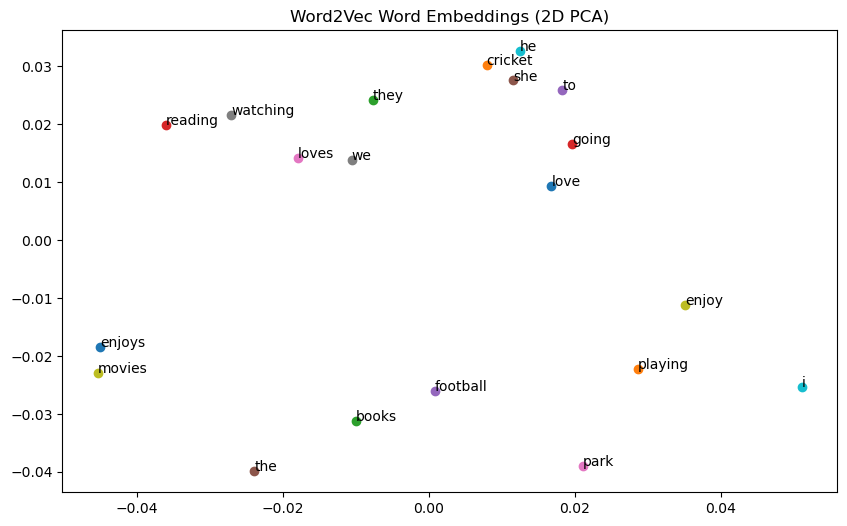

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = list(model.wv.index_to_key)
vectors = [model.wv[word] for word in words]

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.annotate(word, (reduced[i, 0], reduced[i, 1]))
plt.title("Word2Vec Word Embeddings (2D PCA)")
plt.show()
